# SOLVING LAPLACE EQUATION

In this exercise we are going to solve Laplace equation in 2 spatial dimensions using relaxation method for various boundary conditions. In parallel you should solve Laplace equation analytically and compare your analytic answer to the results of numerical simulations. 

In [13]:
# Python translation of the Yuri's notebook into Python using NumPy and matplotlib
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [41]:
# Grid setup
xmin, xmax = 0, 1
ymin, ymax = 0, 1
gridsize = 200

# Define electrostatic potential array
phi = np.zeros((gridsize, gridsize))

# Initialize phi with random values
# Use an educated guess based off the boundary conditions.
phi = np.random.uniform(-100, 100, size=(gridsize, gridsize))

# Set boundary conditions
phi[0, :] = 0 # X=0 boundary condition
phi[-1, :] = 0 # X=1 boundary condition
phi[:, 0] = 0 # Y=0 boundary condition
# Additional boundary condition along Y=1
phi[:, -1] = 100 * np.sin(np.pi * np.array([i for i in range(gridsize)]) / (gridsize - 1))

# Number of iterations. My version of the code requires more iterations but should be more computationally efficient.
itermax = 10_000

# Initialize a list to store phi snapshots for visualization, store initial Phi
figs = [np.copy(phi)]

# Iterative relaxation method
for iter in range(1, itermax + 1):
    PreviousPhi = phi.copy()

    # Its much more efficient to update all vertices simultaneously
    # This is contrary to class where the algorithm was described as iterating
    # through each vertice and updating one at a time
    phi[1:-1, 1:-1] = 0.25 * (
        PreviousPhi[:-2, 1:-1] +  # Above
        PreviousPhi[2:, 1:-1] +   # Below
        PreviousPhi[1:-1, :-2] +  # Left
        PreviousPhi[1:-1, 2:]     # Right
    )

    if iter % 100 == 0: #this controls how many steps we want to save. If set to 100, then every 100th iteration gets saved.
        figs.append(np.copy(phi))



### Now Visualize the result

This will create an animation of the $\Phi$ in the figs list. Depending on grid size and number of iterations could take a little while to generate the animation.

In [42]:
from IPython.display import HTML
from matplotlib.animation import FuncAnimation

# Create a figure and axis for the animation
fig, ax = plt.subplots()
plt.title("Relaxation Evolution")


# Make sure you set vmin and vmax appropriately for the boudary condition!
im = ax.imshow(figs[0], cmap='viridis',vmin=-100, vmax=100)

#use this to surpress some unwanted visualization
plt.close()

# Update function for the animation
def update(frame):
    im.set_array(figs[frame])
    return [im]

# Create the animation
ani = FuncAnimation(fig, update, frames=len(figs), interval=200, blit=True)

# Display the animation in the notebook
HTML(ani.to_jshtml())


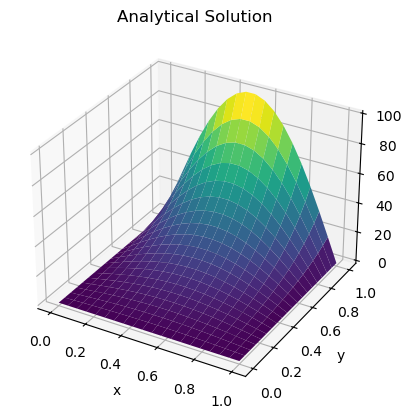

In [43]:
# Analytical solution
from math import sinh, sin, pi

def Phiform(x, y):
    return 100 * sin(pi * x) * sinh(pi * y) / sinh(pi)

# Example of analytical solution plot
X, Y = np.meshgrid(x, y)
Z = np.array([[Phiform(xi, yi) for xi, yi in zip(row_x, row_y)] for row_x, row_y in zip(X, Y)])
fig3d = plt.figure()
ax = fig3d.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
plt.title("Analytical Solution")
plt.xlabel("x")
plt.ylabel("y")
plt.show()


# Assignment

1. (10 pts) Repeat the above  numerical steps for the following boundary conditions : $\Phi= 0$ on all sides except for $\Phi(x, y = 1) = 100*\sin[3 \pi x]$ Find the analytical solution and compare with your numerical result. (The easiest way is by using separation of variables in
rectangular coordinates.) When you turn this in, simply submit your 3 D and contour plots of the answer (no need to show the relaxation steps), along with the plot comparing your result with the analytic answer. 

2. (10 pts) How would you go about simulating the  potential inside of an infinite capacitor on the given finite square lattice? (You
need to get rid of the boundary effects.) Perform the numerical simulations (one capacitor plate has potential of, say, +100, the other one has the potential of - 100). Does the answer agree with your physical expectations? When turning this in, write your anwer to the above question and attach the 3 D plot of the potential resulting from the simulation. 